<a href="https://colab.research.google.com/github/AnitaTasnim/Mentorness-ML-internship/blob/main/worldcup2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# Load dataset from Google Drive
file_path = "/content/drive/MyDrive/mentorness/Machine Learning /CWC23_all_innings.csv"
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset loaded successfully.")
print(dataset.head())

Dataset loaded successfully.
  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05       0.750000  v South Africa    Chennai  27-Oct-23   
1             0.05       0.750000         v India    Lucknow  29-Oct-23   
2             0.05       0.800000       v England  Ahmedabad   5-Oct-23   
3             0.05       0.816667    v Bangladesh    Chennai  13-Oct-23   
4             0.05       0.816667      v Pakistan    Chennai  23-Oct-23   

   overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0   10.0   0.0   4.5     2 NaN NaN NaN      NaN   NaN  

In [4]:
dataset.head()


,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [5]:
df=dataset

In [6]:
df.nunique()

team                10
player             152
bat_or_bowl          2
bb_bf              117
runs               128
wkts                 7
wicketball_prob    129
runs_per_ball      645
opposition          10
ground              10
start_date          41
overs               38
mdns                 4
econ               230
inns                 2
4s                  20
6s                  12
sr                 429
not_out              2
mins               156
dtype: int64

#Team Performance

Team Performance Analysis using Machine Learning techniques, considering the provided columns:

- team
- runs
- wkts
- runs_per_ball
- econ

We will focus on clustering the teams based on these metrics to identify top-performing teams and their strengths.

In [7]:

# Select relevant columns for team performance analysis
team_df = df.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'econ': 'mean'
}).reset_index()

# Display the first few rows of the processed data
print(team_df.head())


  team  runs  wkts  runs_per_ball      econ
0  AFG  4134  53.0       0.855123  5.763818
1  AUS  5234  77.0       0.890978  5.661129
2  BAN  4358  51.0       0.840755  6.095769
3  ENG  4396  65.0       0.935399  6.068302
4  IND  4783  94.0       0.920735  4.963793


In [8]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           10 non-null     object 
 1   runs           10 non-null     int64  
 2   wkts           10 non-null     float64
 3   runs_per_ball  10 non-null     float64
 4   econ           10 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 528.0+ bytes


In [9]:
!pip install scikit-learn
import sklearn.preprocessing

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(team_df[['runs', 'wkts', 'runs_per_ball', 'econ']])

# Create a new DataFrame with scaled features
team_scaled_df = pd.DataFrame(scaled_features, columns=['runs', 'wkts', 'runs_per_ball', 'econ'])
team_scaled_df['team'] = team_df['team']

# Display the first few rows of the scaled data
print(team_scaled_df.head())


       runs      wkts  runs_per_ball      econ team
0 -1.309260 -1.027671      -0.743052 -0.438630  AFG
1  1.329410  0.650159      -0.142036 -0.675956  AUS
2 -0.771931 -1.167490      -0.983907  0.328544  BAN
3 -0.680777 -0.188756       0.602576  0.265064  ENG
4  0.247555  1.838621       0.356759 -2.287573  IND


**Applying KMeans Clustering**

Apply KMeans clustering to identify top-performing team

  team  cluster
0  AFG        1
1  AUS        0
2  BAN        1
3  ENG        2
4  IND        0
5  NED        1
6   NZ        2
7  PAK        2
8   SA        0
9   SL        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


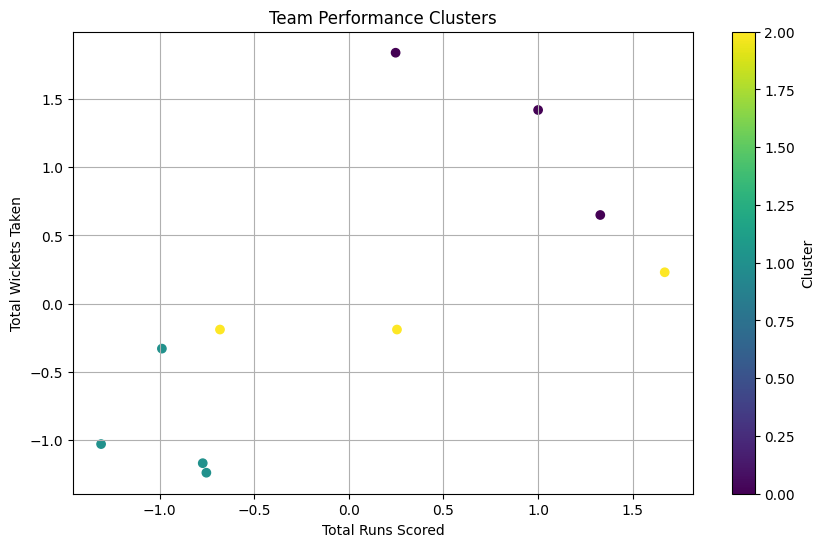

In [13]:
# Choose the number of clusters (you can experiment with different values)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
team_scaled_df['cluster'] = kmeans.fit_predict(team_scaled_df[['runs', 'wkts', 'runs_per_ball', 'econ']])

# Display the clusters
print(team_scaled_df[['team', 'cluster']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(team_scaled_df['runs'], team_scaled_df['wkts'], c=team_scaled_df['cluster'], cmap='viridis')
plt.xlabel('Total Runs Scored')
plt.ylabel('Total Wickets Taken')
plt.title('Team Performance Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [14]:
# Choose the number of clusters (you can experiment with different values)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
team_scaled_df['cluster'] = kmeans.fit_predict(team_scaled_df[['runs', 'wkts', 'runs_per_ball', 'econ']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Display the clusters
print(team_scaled_df[['team', 'cluster']])


  team  cluster
0  AFG        1
1  AUS        0
2  BAN        1
3  ENG        2
4  IND        0
5  NED        1
6   NZ        2
7  PAK        2
8   SA        0
9   SL        1


Based on the clustering results, we have grouped the 10 teams into 3 clusters. Each cluster represents teams with similar performance metrics in terms of runs scored, wickets taken, runs per ball, and economy rate.

Cluster 0: Contains teams with similar performance characteristics (Australia, India, South Africa).

Cluster 1: Contains teams with similar performance characteristics (Afghanistan, Bangladesh, Netherlands, Sri Lanka).

Cluster 2: Contains teams with similar performance characteristics (England, New Zealand, Pakistan).

In [16]:
# Calculate average metrics for each cluster
cluster_avg = team_scaled_df.groupby('cluster')[['runs', 'wkts', 'runs_per_ball', 'econ']].mean()
print("Average Metrics for Each Cluster:")
print(cluster_avg)


Average Metrics for Each Cluster:
             runs      wkts  runs_per_ball      econ
cluster                                             
0        0.859247  1.302648       0.467477 -1.196484
1       -0.955438 -0.940284      -1.068135  0.474699
2        0.414671 -0.048937       0.956703  0.563553


In [17]:
# Calculate centroids for each cluster
cluster_centroids = kmeans.cluster_centers_
print("\nCluster Centroids:")
print(cluster_centroids)



Cluster Centroids:
[[ 0.85924693  1.30264815  0.46747692 -1.19648392]
 [-0.95543845 -0.94028359 -1.06813482  0.4746985 ]
 [ 0.414671   -0.04893669  0.95670283  0.56355258]]


<ipython-input-18-8b12512eff25>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(team_scaled_df.loc[i, 'runs'], team_scaled_df.loc[i, 'wkts'], label=None, c=colors[cluster], cmap='viridis', s=100)
<ipython-input-18-8b12512eff25>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter([], [], c=colors[i], label=f'Cluster {i}', cmap='viridis', s=100)


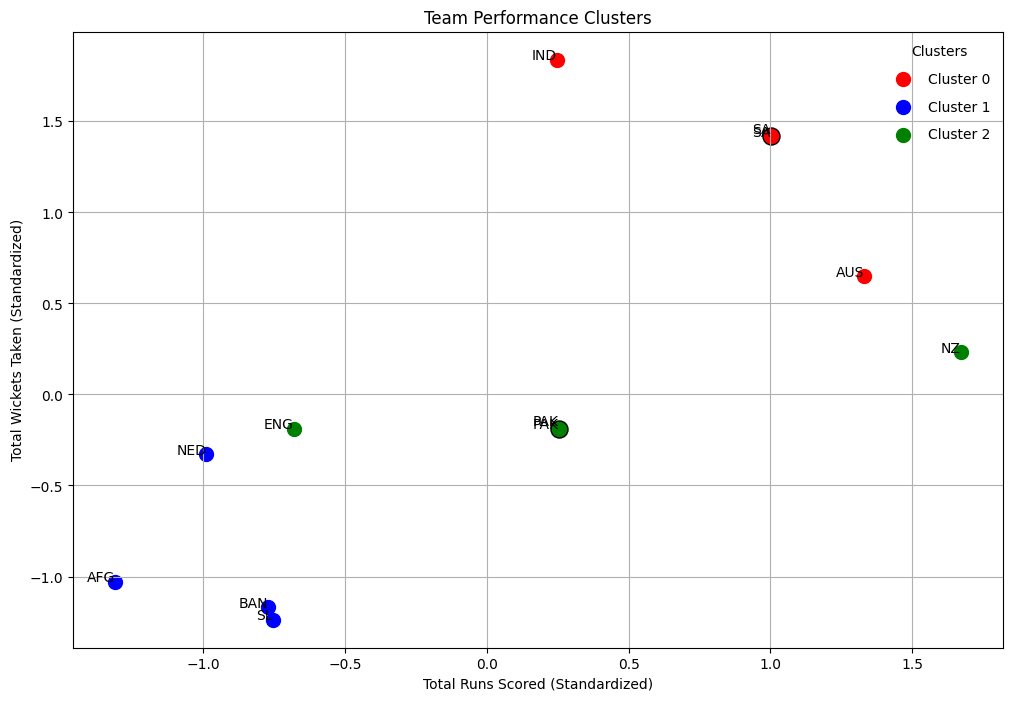

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot with team names labeled by clusters
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['red', 'blue', 'green']

# Scatter plot with all team names labeled by clusters
for i, team in enumerate(team_scaled_df['team']):
    cluster = team_scaled_df.loc[i, 'cluster']
    plt.scatter(team_scaled_df.loc[i, 'runs'], team_scaled_df.loc[i, 'wkts'], label=None, c=colors[cluster], cmap='viridis', s=100)
    plt.text(team_scaled_df.loc[i, 'runs'], team_scaled_df.loc[i, 'wkts'], team, fontsize=10, ha='right')

# Highlight specific team names (e.g., PAK, SA)
highlight_teams = ['PAK', 'SA']
for team in highlight_teams:
    idx = team_scaled_df[team_scaled_df['team'] == team].index[0]
    cluster = team_scaled_df.loc[idx, 'cluster']
    plt.scatter(team_scaled_df.loc[idx, 'runs'], team_scaled_df.loc[idx, 'wkts'], label=None, c=colors[cluster], s=150, edgecolors='black')
    plt.text(team_scaled_df.loc[idx, 'runs'], team_scaled_df.loc[idx, 'wkts'], team, fontsize=10, ha='right', va='bottom')

# Add labels and title
plt.xlabel('Total Runs Scored (Standardized)')
plt.ylabel('Total Wickets Taken (Standardized)')
plt.title('Team Performance Clusters')

# Show the legend with cluster colors
for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label=f'Cluster {i}', cmap='viridis', s=100)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Clusters')

# Show the plot
plt.grid(True)
plt.show()


So, INDIA AUSTRALIA and SA are top performed team

In [19]:
data=df
import seaborn as sns

TEAMS based on total runs

and based on total wikets

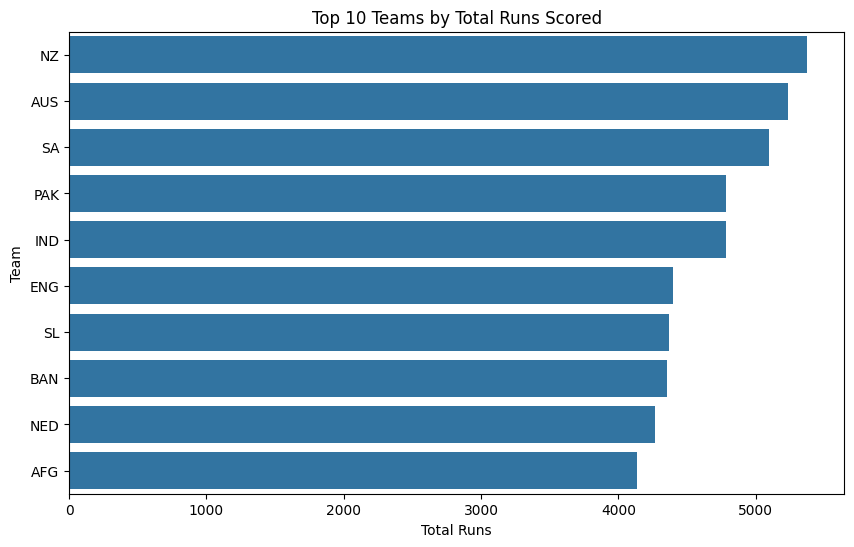

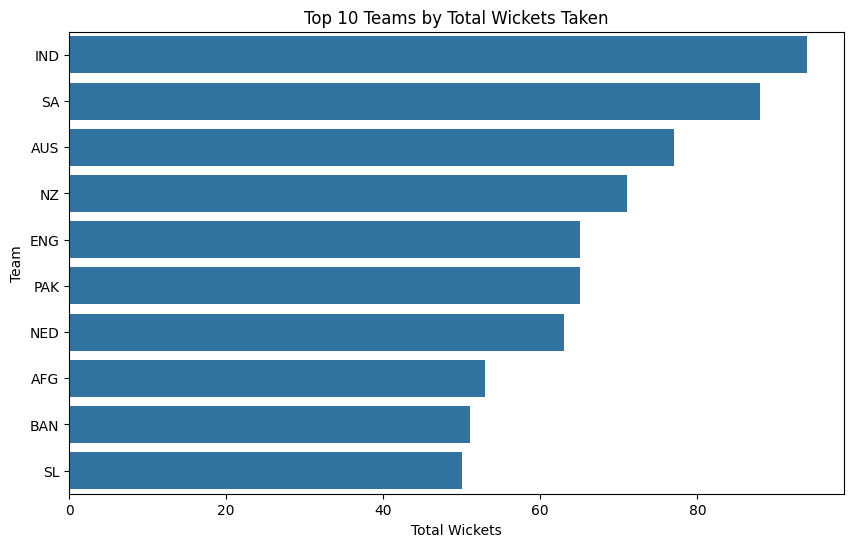

In [20]:
# Calculate team-wise total runs scored
team_runs = data.groupby('team')['runs'].sum().reset_index().sort_values(by='runs', ascending=False)

# Calculate team-wise total wickets taken
team_wickets = data.groupby('team')['wkts'].sum().reset_index().sort_values(by='wkts', ascending=False)

# Plotting top 10 teams by runs scored
plt.figure(figsize=(10, 6))
sns.barplot(x='runs', y='team', data=team_runs.head(10))
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.title('Top 10 Teams by Total Runs Scored')
plt.show()

# Plotting top 10 teams by wickets taken
plt.figure(figsize=(10, 6))
sns.barplot(x='wkts', y='team', data=team_wickets.head(10))
plt.xlabel('Total Wickets')
plt.ylabel('Team')
plt.title('Top 10 Teams by Total Wickets Taken')
plt.show()


Batting and Bowling Styles of Each Team

To analyze the batting and bowling styles, we can look at the average strike rate (for batting) and average economy rate (for bowling) for each team:

<ipython-input-21-4fc3a058f4e2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sr', y='team', data=team_avg_strike_rate, palette='rocket')


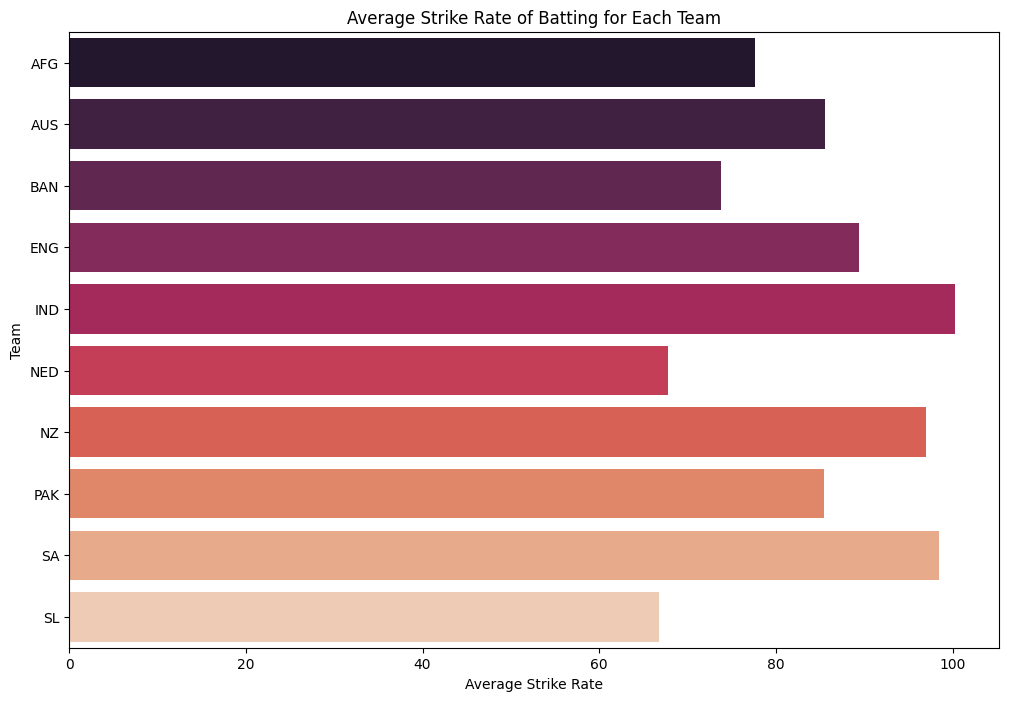

<ipython-input-21-4fc3a058f4e2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='econ', y='team', data=team_avg_economy_rate, palette='cividis')


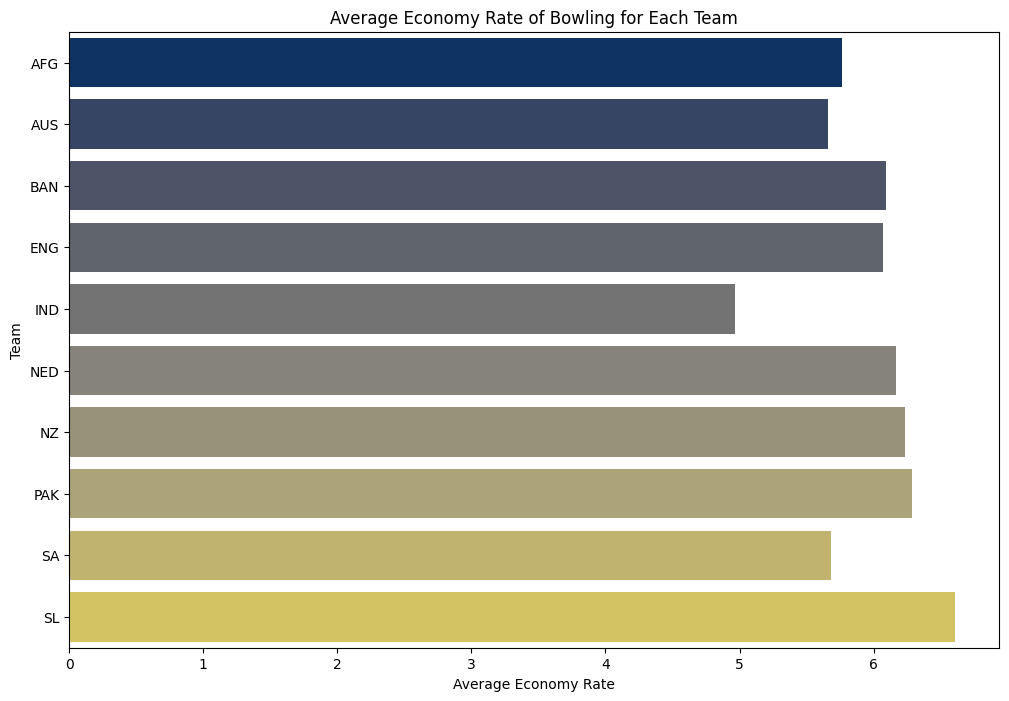

In [21]:
# Calculate average strike rate for batting and average economy rate for bowling for each team
team_avg_strike_rate = data[data['bat_or_bowl'] == 'bat'].groupby('team')['sr'].mean().reset_index()
team_avg_economy_rate = data[data['bat_or_bowl'] == 'bowl'].groupby('team')['econ'].mean().reset_index()

# Plotting average strike rate of batting for each team
plt.figure(figsize=(12, 8))
sns.barplot(x='sr', y='team', data=team_avg_strike_rate, palette='rocket')
plt.xlabel('Average Strike Rate')
plt.ylabel('Team')
plt.title('Average Strike Rate of Batting for Each Team')
plt.show()

# Plotting average economy rate of bowling for each team
plt.figure(figsize=(12, 8))
sns.barplot(x='econ', y='team', data=team_avg_economy_rate, palette='cividis')
plt.xlabel('Average Economy Rate')
plt.ylabel('Team')
plt.title('Average Economy Rate of Bowling for Each Team')
plt.show()


#Task 2. Player Performance Analysis

Player Performance Analysis:

Leading Run-Scorers:


Calculate the total runs scored by each player.
Plot a bar chart to visualize the leading run-scorers.

> Add blockquote



<ipython-input-22-7ea712dbf430>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runs', y='player', data=player_total_runs.head(10), palette='mako')


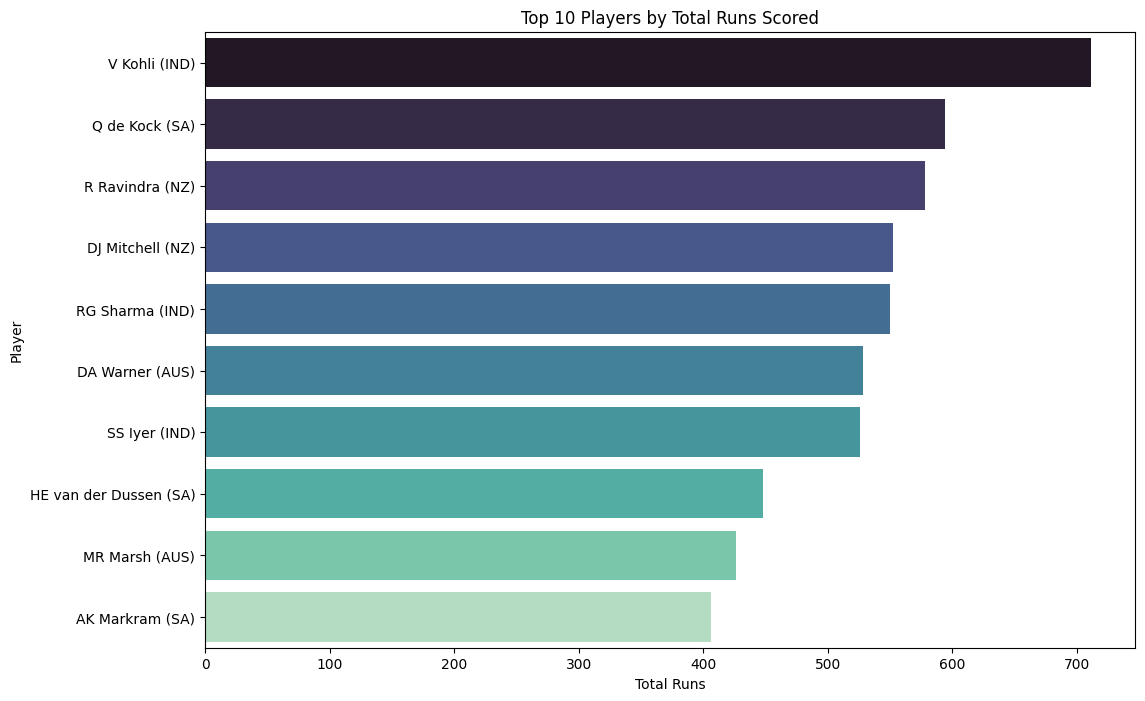

In [22]:
# Calculate total runs scored by each player
player_total_runs = data[data['bat_or_bowl'] == 'bat'].groupby('player')['runs'].sum().reset_index().sort_values(by='runs', ascending=False)

# Plotting total runs scored by each player
plt.figure(figsize=(12, 8))
sns.barplot(x='runs', y='player', data=player_total_runs.head(10), palette='mako')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.title('Top 10 Players by Total Runs Scored')
plt.show()


Leading Wicket-Takers:


Calculate the total wickets taken by each player.

Plot a bar chart to visualize the leading wicket-takers.

<ipython-input-23-04a2f59acd0d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wkts', y='player', data=player_total_wickets.head(10), palette='viridis')


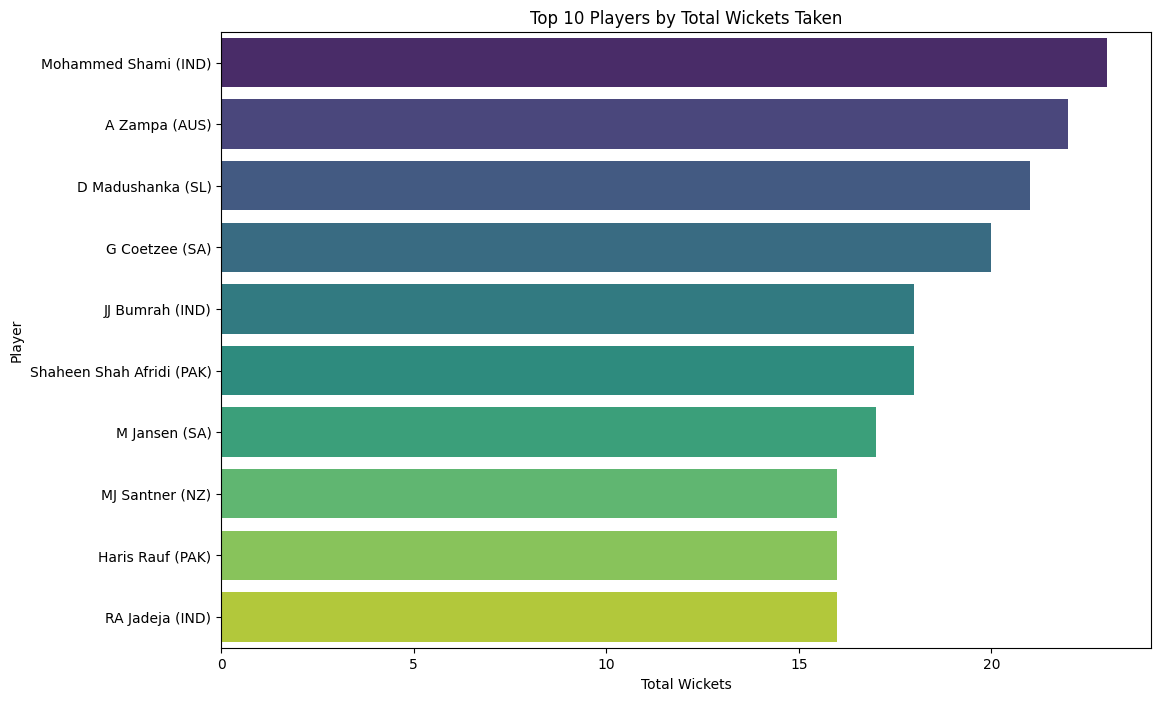

In [23]:
# Calculate total wickets taken by each player
player_total_wickets = data[data['bat_or_bowl'] == 'bowl'].groupby('player')['wkts'].sum().reset_index().sort_values(by='wkts', ascending=False)

# Plotting total wickets taken by each player
plt.figure(figsize=(12, 8))
sns.barplot(x='wkts', y='player', data=player_total_wickets.head(10), palette='viridis')
plt.xlabel('Total Wickets')
plt.ylabel('Player')
plt.title('Top 10 Players by Total Wickets Taken')
plt.show()


Assessing Impact on Team's Performance:


To assess the impact of players on their team's performance, we can calculate metrics such as average runs scored per match (for batting) and average wickets taken per match (for bowling).


We'll plot these to visualize the impact.

<ipython-input-24-fd51ede75917>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runs', y='player', data=player_avg_runs.head(10), palette='rocket')


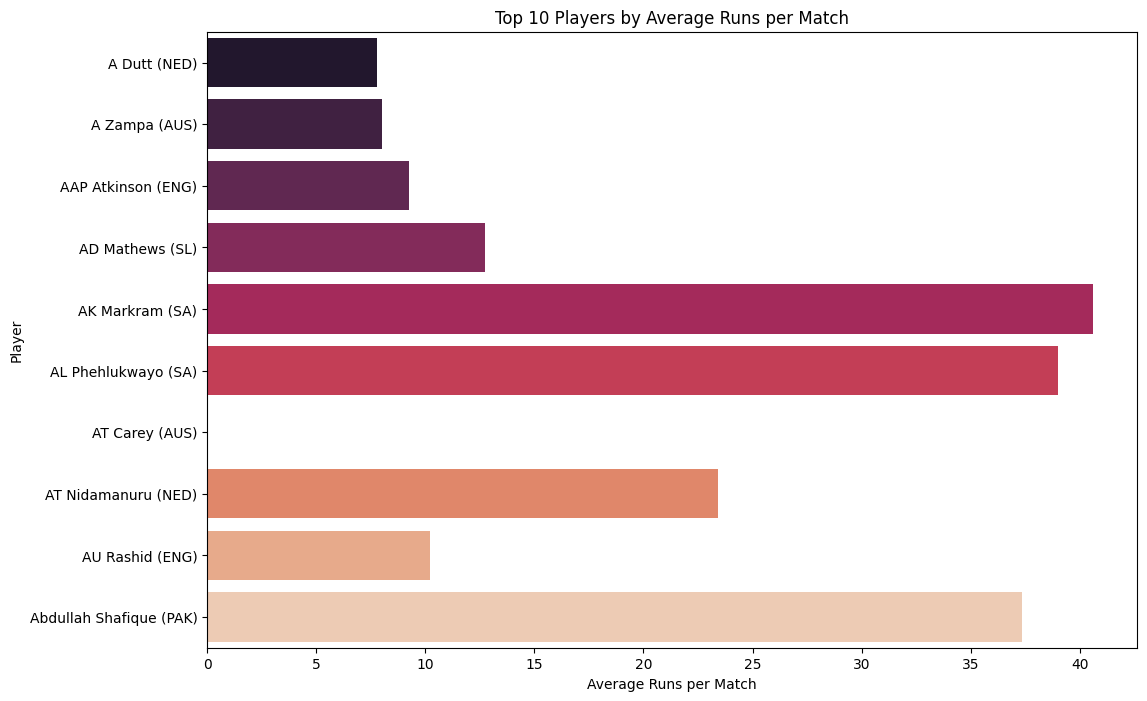

<ipython-input-24-fd51ede75917>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wkts', y='player', data=player_avg_wickets.head(10), palette='cividis')


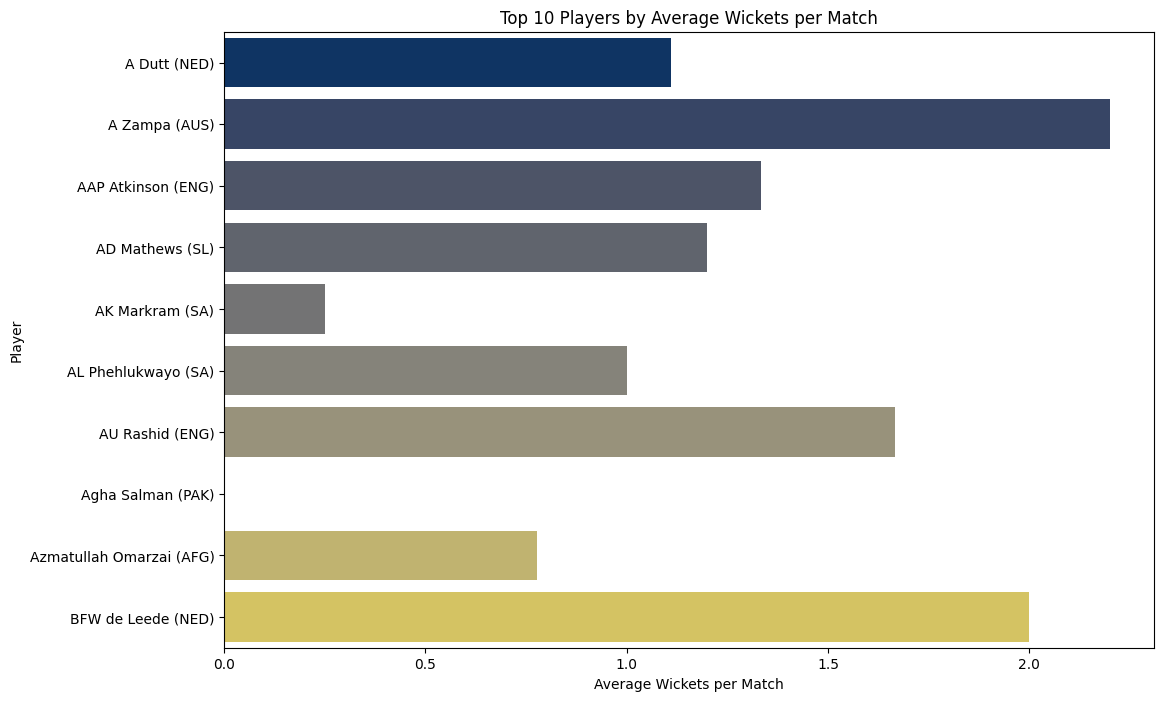

In [24]:
# Calculate average runs per match for each player
player_avg_runs = data[data['bat_or_bowl'] == 'bat'].groupby('player')['runs'].mean().reset_index()

# Calculate average wickets per match for each player
player_avg_wickets = data[data['bat_or_bowl'] == 'bowl'].groupby('player')['wkts'].mean().reset_index()

# Plotting average runs per match for each player
plt.figure(figsize=(12, 8))
sns.barplot(x='runs', y='player', data=player_avg_runs.head(10), palette='rocket')
plt.xlabel('Average Runs per Match')
plt.ylabel('Player')
plt.title('Top 10 Players by Average Runs per Match')
plt.show()

# Plotting average wickets per match for each player
plt.figure(figsize=(12, 8))
sns.barplot(x='wkts', y='player', data=player_avg_wickets.head(10), palette='cividis')
plt.xlabel('Average Wickets per Match')
plt.ylabel('Player')
plt.title('Top 10 Players by Average Wickets per Match')
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [26]:
data=df



In [27]:
df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [31]:
df['mins'].unique()

array([ nan, 181., 192., 180., 147., 106., 172., 193., 111., 217., 103.,
       141., 124., 139., 137., 176., 150., 119.,  94., 161., 170., 159.,
       136.,  84.,  53., 182., 113., 195., 140., 173., 154., 168., 151.,
       163., 146., 162.,  92.,  91., 171., 107., 128.,  77., 126.,  87.,
        83., 158., 102., 123., 129., 110., 101.,  55.,  99.,  72., 133.,
       121.,  80., 109.,  88., 100.,  98., 104.,  86., 114., 122.,  93.,
        82.,  60., 112., 108., 132.,  75.,  89.,  64.,  85.,  61.,  69.,
        59.,  48.,  97.,  67.,  81.,  74.,  79.,  66.,  46.,  51.,  78.,
       125.,  44.,  54.,  70.,  25.,  45.,  63.,  50.,  58.,  47.,  76.,
        37.,  49.,  40.,  32.,  36.,  73.,  42.,  23.,  65.,  31.,  41.,
        26.,  57.,  52.,  30.,  38.,  35.,  21.,  71.,  22.,  39.,  43.,
        56.,  27.,  33.,  15.,  20.,  28.,  19.,  14.,  18.,  29.,  34.,
        10.,  11.,  24.,  17.,  13.,   8.,  12.,  16.,   6.,   9.,   7.,
         2.,   4.,   1.,   5.,   3., 177., 115.,  9

In [32]:
# Fill NaN values in 'runs' column with the mean of that column
#4s	6s	sr	not_out	mins
data['4s'] = data['4s'].fillna(data['4s'].mean())
data['6s'] = data['6s'].fillna(data['6s'].mean())
data['sr'] = data['sr'].fillna(data['sr'].mean())
data['not_out'] = data['not_out'].fillna(data['not_out'].mean())
data['mins'] = data['mins'].fillna(data['mins'].mean())


In [33]:
df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,2.605201,0.751773,83.716596,0.1513,42.72104
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,2.605201,0.751773,83.716596,0.1513,42.72104
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,2.605201,0.751773,83.716596,0.1513,42.72104
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,2.605201,0.751773,83.716596,0.1513,42.72104
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,2.605201,0.751773,83.716596,0.1513,42.72104


calculate best player

To calculate the best player analysis based on the dataset you provided, we can create a scoring system that takes into account various factors such as runs scored, wickets taken, strike rate, economy rate, and other relevant metrics. This scoring system will help us rank the players based on their overall performance.

We will assign weights to each metric based on its importance. Here's a basic scoring system example:

Runs Scored (Weight: 4): Higher weight as it directly impacts the team's score.

Wickets Taken (Weight: 4): Higher weight as it directly impacts the opponent's score.

Strike Rate (Weight: 2): Importance in scoring runs quickly.

Economy Rate (Weight: 2): Importance in restricting opponent's scoring.

Fours (Weight: 1): Indicates boundary-hitting ability.

Sixes (Weight: 2): Indicates power-hitting ability.

Not Out (Weight: 1): Indicates the ability to stay at the crease.

We will then calculate a total score for each player by summing up the weighted scores for these metrics.


Here's the code to calculate the best player analysis based on the provided dataset:

In [37]:
import pandas as pd

# Load the dataset

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Define weights for scoring system
weights = {
    'runs': 4,
    'wkts': 4,
    'sr': 2,
    'econ': 2,
    '4s': 1,
    '6s': 2,
    'not_out': 1
}

# Calculate total score for each player
data['total_score'] = (
    weights['runs'] * data['runs'] +
    weights['wkts'] * data['wkts'] +
    weights['sr'] * data['sr'] +
    weights['econ'] * data['econ'] +
    weights['4s'] * data['4s'] +
    weights['6s'] * data['6s'] +
    weights['not_out'] * data['not_out']
)

# Sort players by total score to find the best performer
best_players = data.sort_values(by='total_score', ascending=False)

# Display the top 10 best players
print("Top 10 Best Players:")
best_players[['player', 'total_score']].head(10)


  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground  ... overs  mdns  \
0             0.05       0.750000  v South Africa    Chennai  ...  10.0   0.0   
1             0.05       0.750000         v India    Lucknow  ...  10.0   2.0   
2             0.05       0.800000       v England  Ahmedabad  ...  10.0   1.0   
3             0.05       0.816667    v Bangladesh    Chennai  ...  10.0   0.0   
4             0.05       0.816667      v Pakistan    Chennai  ...  10.0   0.0   

   econ  inns        4s        6s         sr  not_out      mins  total_score  
0   4.5     2  2.605201  

,player,total_score
183,BFW de Leede (NED),662.693239
1347,LV van Beek (NED),621.093239
1388,TG Southee (NZ),603.693239
322,M Pathirana (SL),574.693239
321,M Jansen (SA),571.133239
182,M Jansen (SA),566.093239
320,M Pathirana (SL),555.693239
19,RJW Topley (ENG),555.613239
319,CAK Rajitha (SL),553.693239
1341,PA van Meekeren (NED),553.693239


Player Performance Prediction Models:

Batting Analysis:

Bowling Analysis:

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# Handling Missing Values
imputer = SimpleImputer(strategy='mean')
cols_to_impute = ['wkts', 'overs', 'mdns', 'econ', 'total_score']
data[cols_to_impute] = imputer.fit_transform(data[cols_to_impute])

# Separate Batting and Bowling Data
batting_data = data[data['bat_or_bowl'] == 'bat']
bowling_data = data[data['bat_or_bowl'] == 'bowl']

# Define features and target for batting
X_bat = batting_data[['bb_bf', '4s', '6s', 'sr', 'not_out']]
y_bat = batting_data['runs']

# Define features and target for bowling
X_bowl = bowling_data[['wkts', 'overs', 'mdns', 'econ']]
y_bowl = bowling_data['wkts']

# Create pipelines for batting and bowling
pipeline_bat = Pipeline([
    ('model', RandomForestRegressor(random_state=42))
])

pipeline_bowl = Pipeline([
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the pipelines on the training data
pipeline_bat.fit(X_bat, y_bat)
pipeline_bowl.fit(X_bowl, y_bowl)

# Get the player with the highest predicted runs (for batting)
best_batting_player_idx = pipeline_bat.predict(X_bat).argmax()
best_batting_player = batting_data.iloc[best_batting_player_idx]['player']

# Get the player with the highest predicted wickets (for bowling)
best_bowling_player_idx = pipeline_bowl.predict(X_bowl).argmax()
best_bowling_player = bowling_data.iloc[best_bowling_player_idx]['player']

print("Best Batting Performer:", best_batting_player)
print("Best Bowling Performer:", best_bowling_player)


Best Batting Performer: GJ Maxwell (AUS)
Best Bowling Performer: Mohammed Shami (IND)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             1408 non-null   float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            1408 non-null   float64
 12  mdns             1408 non-null   float64
 13  econ             1408 non-null   float64
 14  inns             1408 non-null   int64  
 15  4s               1408 non-null   float64
 16  6s               1408 non-null   float64
 17  sr            

#3. Opposition and Ground Analysis:

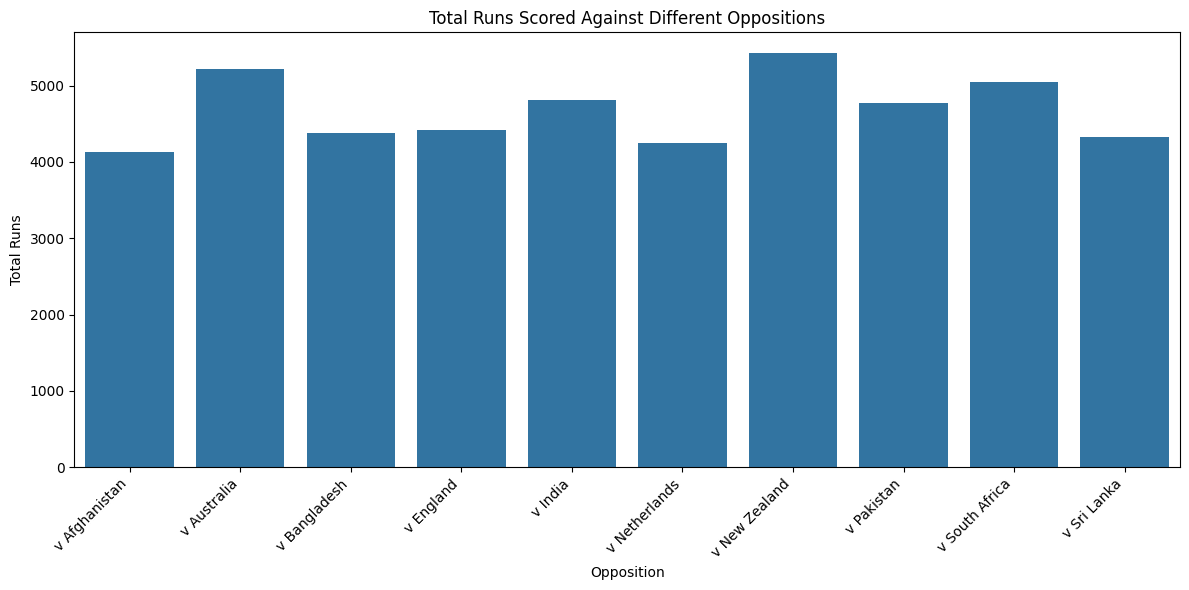

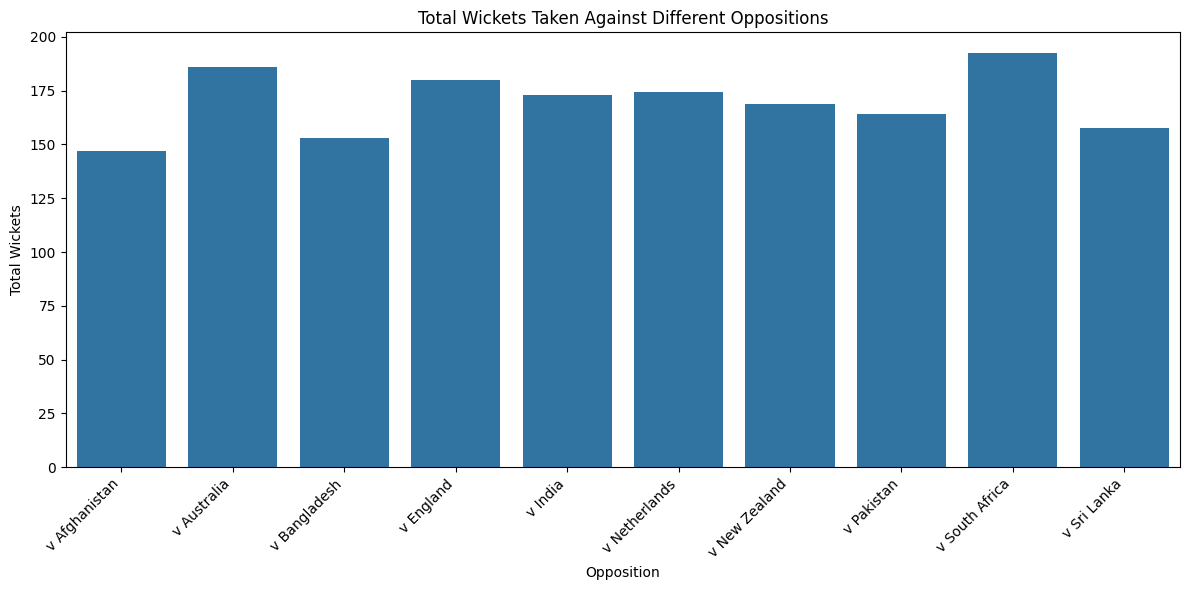

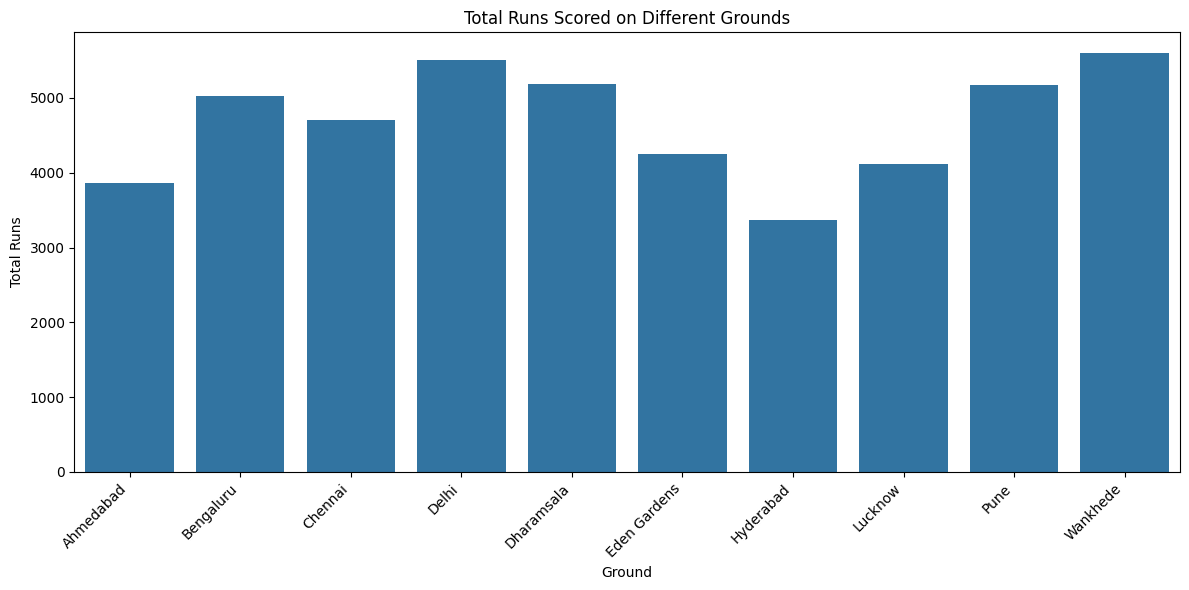

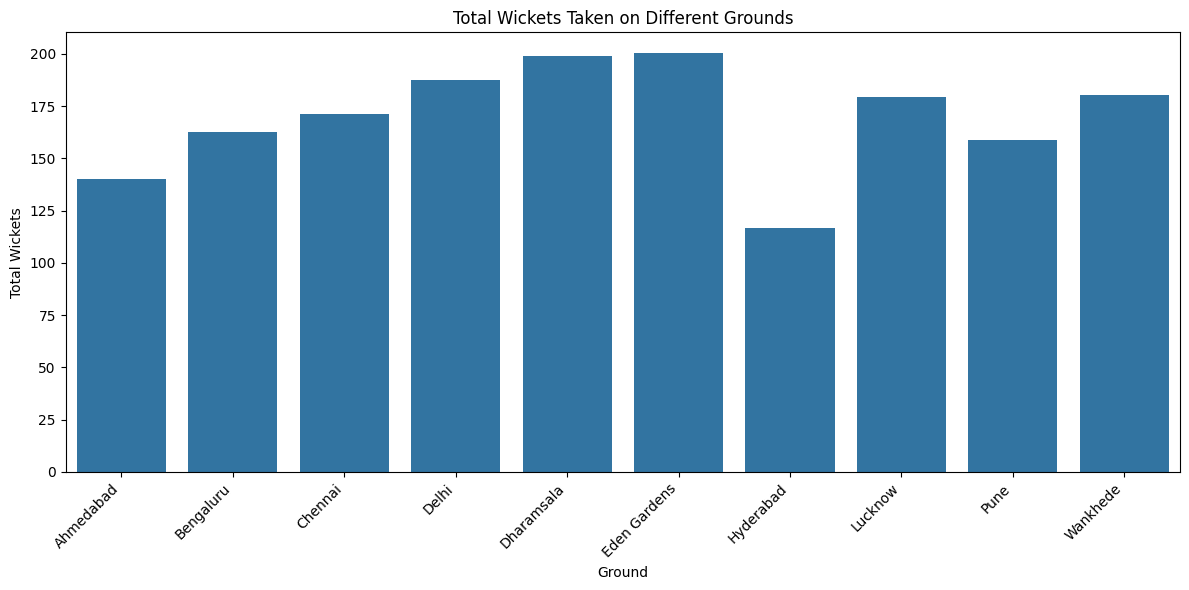

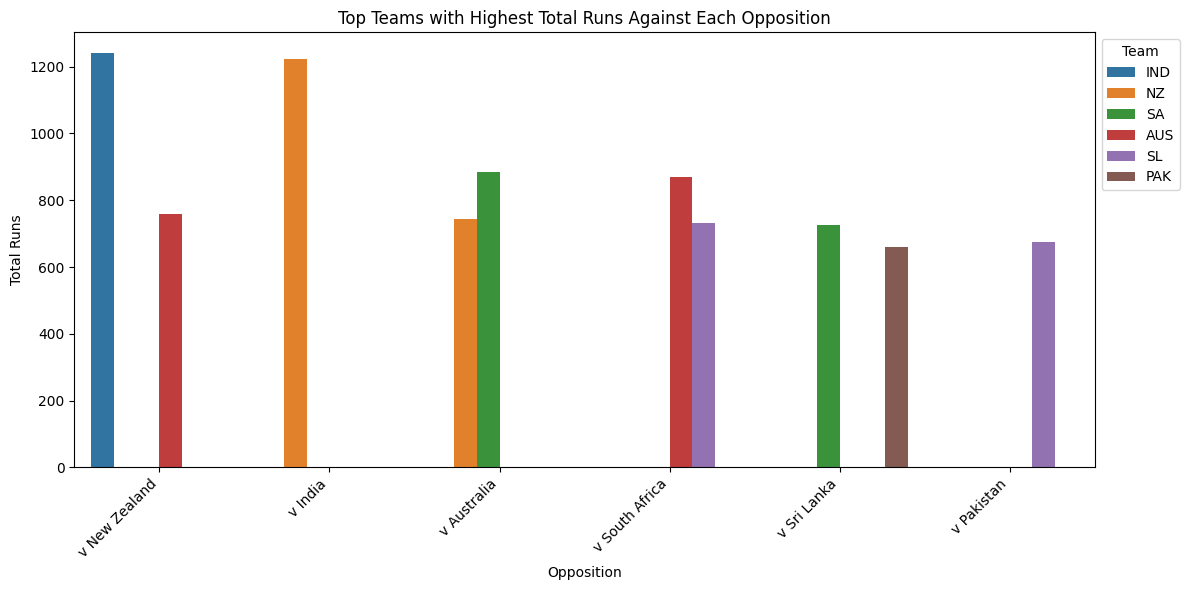

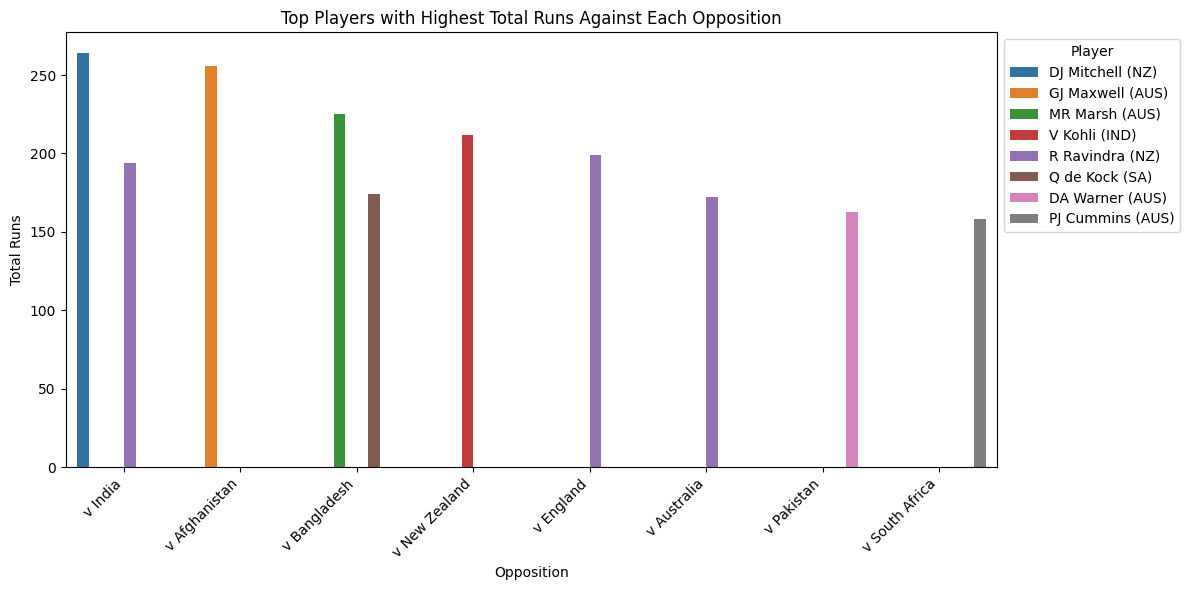

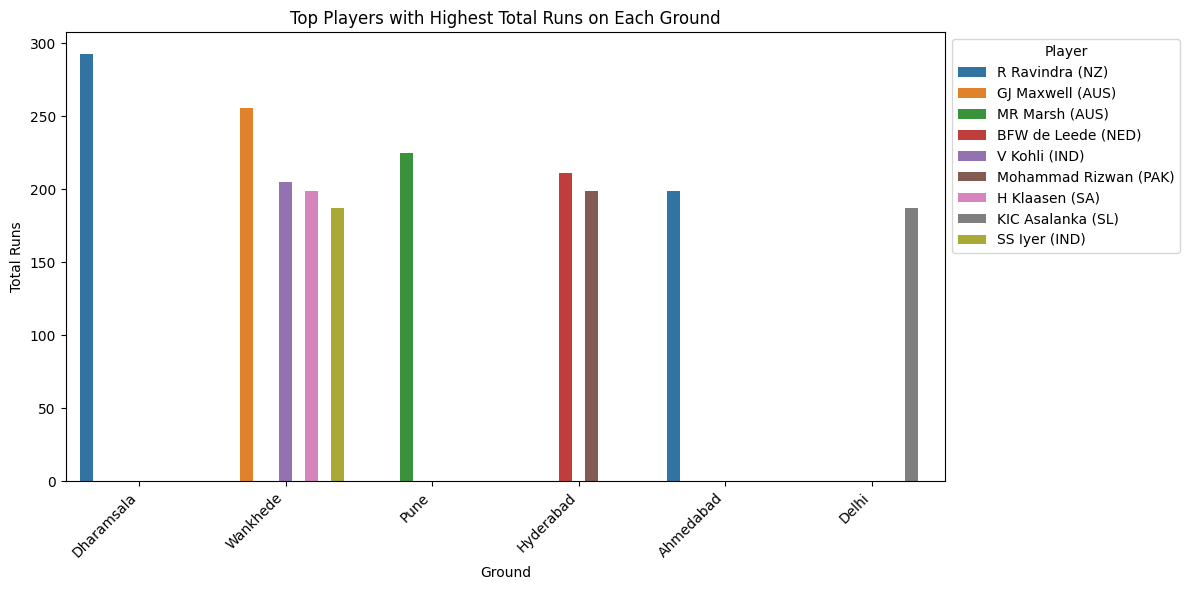

In [48]:


# Opposition Analysis
opposition_stats = data.groupby('opposition').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'player': pd.Series.nunique
}).reset_index()

# Ground Analysis
ground_stats = data.groupby('ground').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'player': pd.Series.nunique
}).reset_index()

# Identify Teams or Players that Excel in Certain Conditions
# Teams with the highest total runs against a specific opposition
best_teams_by_opposition = data.groupby(['opposition', 'team']).agg({
    'runs': 'sum'
}).reset_index().sort_values(by='runs', ascending=False)

# Players with the highest total runs or wickets against a specific opposition or on a specific ground
best_players_by_opposition = data.groupby(['opposition', 'player']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index().sort_values(by=['runs', 'wkts'], ascending=False)

best_players_by_ground = data.groupby(['ground', 'player']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index().sort_values(by=['runs', 'wkts'], ascending=False)

# Visualization - Opposition Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='opposition', y='runs', data=opposition_stats)
plt.title('Total Runs Scored Against Different Oppositions')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Opposition')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='opposition', y='wkts', data=opposition_stats)
plt.title('Total Wickets Taken Against Different Oppositions')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Opposition')
plt.ylabel('Total Wickets')
plt.tight_layout()
plt.show()

# Visualization - Ground Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='ground', y='runs', data=ground_stats)
plt.title('Total Runs Scored on Different Grounds')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ground')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='ground', y='wkts', data=ground_stats)
plt.title('Total Wickets Taken on Different Grounds')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ground')
plt.ylabel('Total Wickets')
plt.tight_layout()
plt.show()

# Visualization - Teams or Players Excel in Certain Conditions
plt.figure(figsize=(12, 6))
sns.barplot(x='opposition', y='runs', hue='team', data=best_teams_by_opposition.head(10))
plt.title('Top Teams with Highest Total Runs Against Each Opposition')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Opposition')
plt.ylabel('Total Runs')
plt.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='opposition', y='runs', hue='player', data=best_players_by_opposition.head(10))
plt.title('Top Players with Highest Total Runs Against Each Opposition')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Opposition')
plt.ylabel('Total Runs')
plt.legend(title='Player', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='ground', y='runs', hue='player', data=best_players_by_ground.head(10))
plt.title('Top Players with Highest Total Runs on Each Ground')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ground')
plt.ylabel('Total Runs')
plt.legend(title='Player', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()



Opposition Analysis:

We group the data by 'opposition' to calculate total runs, total wickets, and the number of unique players against each opposition.
We then visualize the total runs scored and total wickets taken against different oppositions using bar plots.


Ground Analysis:

We group the data by 'ground' to calculate total runs, total wickets, and the number of unique players on each ground.
We then visualize the total runs scored and total wickets taken on different grounds using bar plots.


Teams or Players that Excel in Certain Conditions:

We identify the teams with the highest total runs against each opposition.


We also identify the players with the highest total runs or wickets against each opposition or on each ground.
We visualize this information using bar plots to see which teams or players excel in specific conditions.

#4. Temporal Analysis:

<ipython-input-49-5018ed9e5d50>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['start_date'] = pd.to_datetime(data['start_date'])


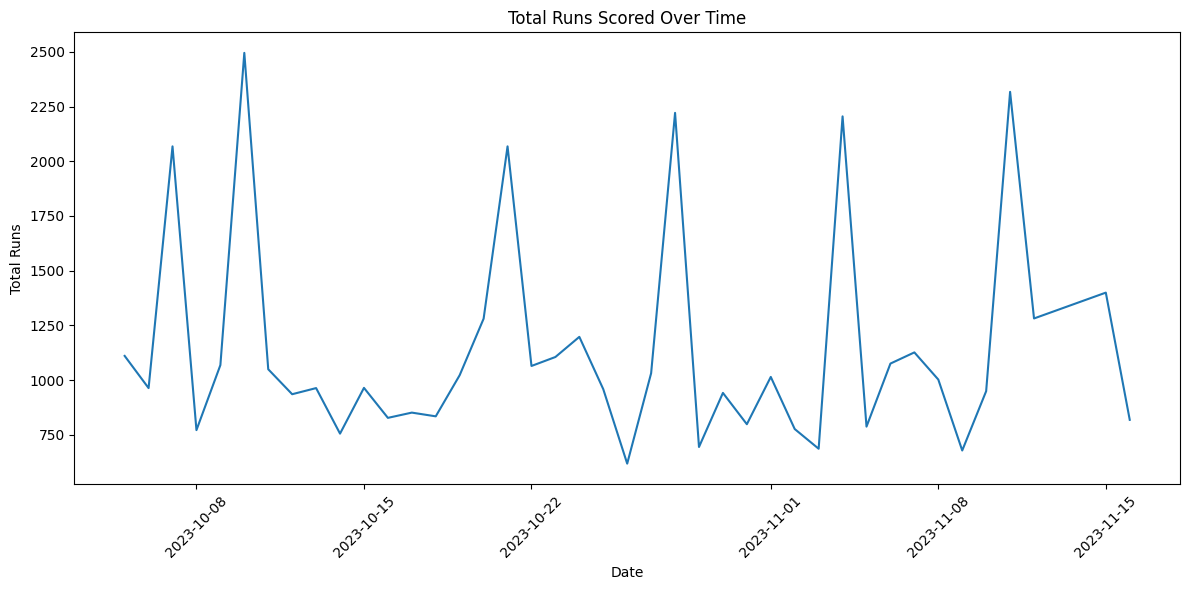

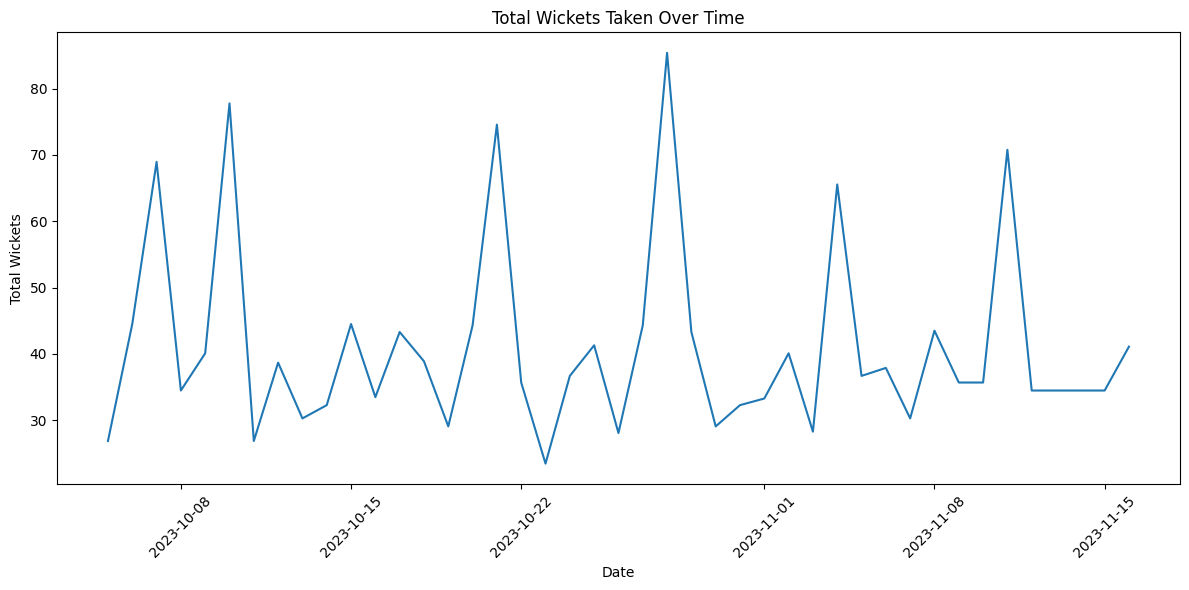

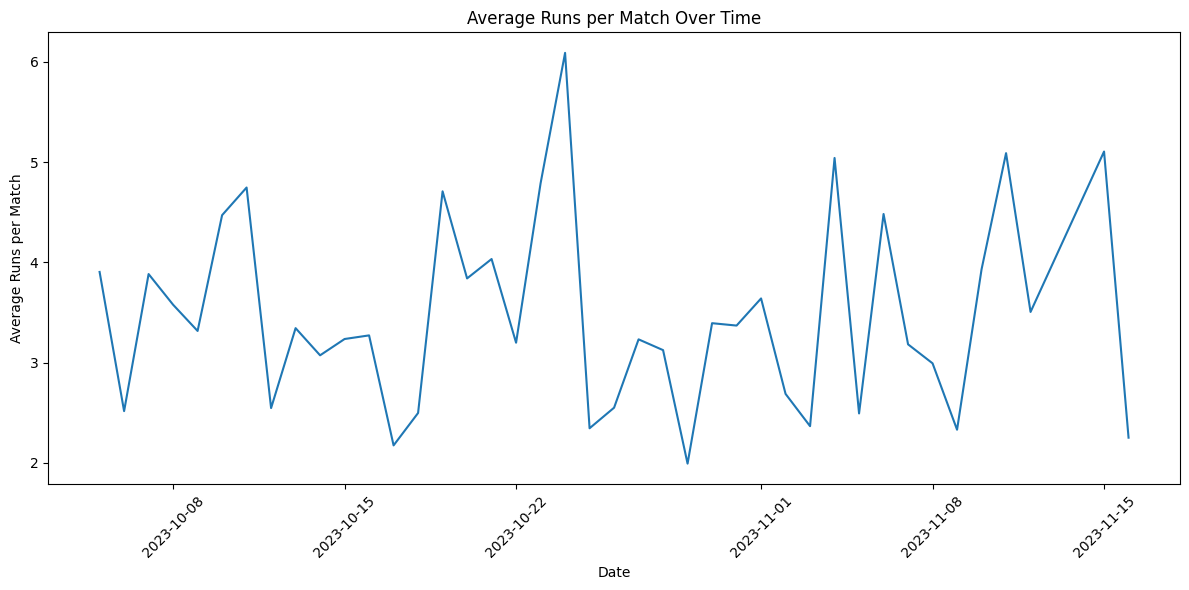

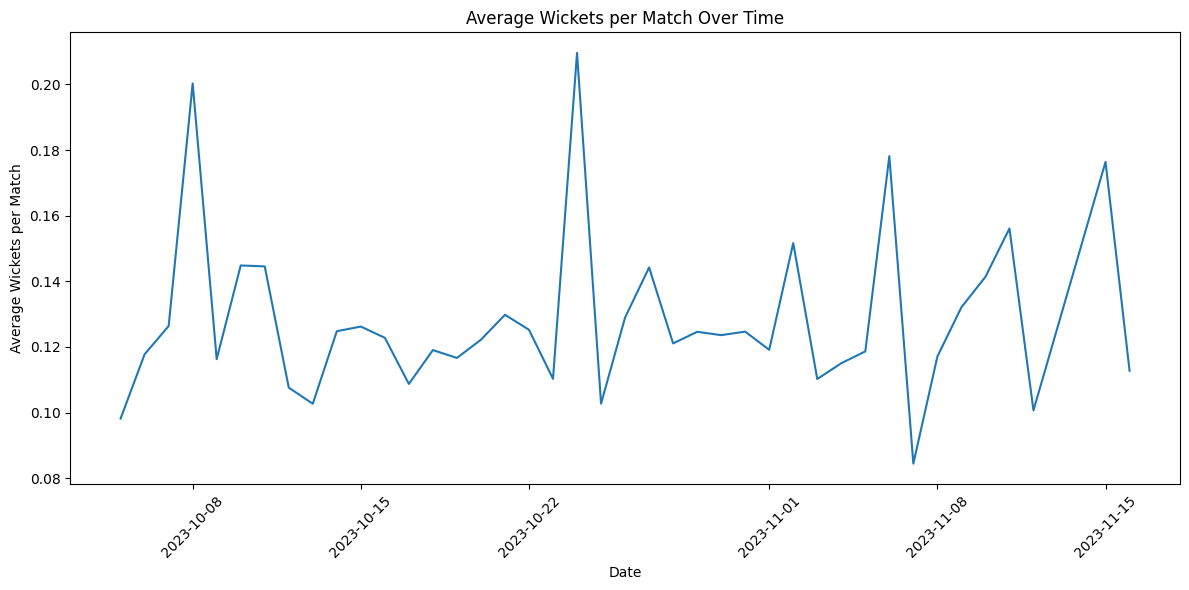

In [49]:

# Convert 'start_date' column to datetime format
data['start_date'] = pd.to_datetime(data['start_date'])

# Temporal Analysis - Total Runs Scored Over Time
total_runs_over_time = data.groupby('start_date')['runs'].sum().reset_index()

# Temporal Analysis - Total Wickets Taken Over Time
total_wickets_over_time = data.groupby('start_date')['wkts'].sum().reset_index()

# Plotting Temporal Analysis - Total Runs Scored Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='runs', data=total_runs_over_time)
plt.title('Total Runs Scored Over Time')
plt.xlabel('Date')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Temporal Analysis - Total Wickets Taken Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='wkts', data=total_wickets_over_time)
plt.title('Total Wickets Taken Over Time')
plt.xlabel('Date')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Temporal Analysis - Average Runs per Match Over Time
data['matches_played'] = data.groupby('player')['start_date'].transform('count')
data['avg_runs_per_match'] = data['runs'] / data['matches_played']
avg_runs_per_match_over_time = data.groupby('start_date')['avg_runs_per_match'].mean().reset_index()

# Temporal Analysis - Average Wickets per Match Over Time
data['avg_wkts_per_match'] = data['wkts'] / data['matches_played']
avg_wkts_per_match_over_time = data.groupby('start_date')['avg_wkts_per_match'].mean().reset_index()

# Plotting Temporal Analysis - Average Runs per Match Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='avg_runs_per_match', data=avg_runs_per_match_over_time)
plt.title('Average Runs per Match Over Time')
plt.xlabel('Date')
plt.ylabel('Average Runs per Match')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Temporal Analysis - Average Wickets per Match Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='avg_wkts_per_match', data=avg_wkts_per_match_over_time)
plt.title('Average Wickets per Match Over Time')
plt.xlabel('Date')
plt.ylabel('Average Wickets per Match')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We start by loading the dataset and converting the 'start_date' column to datetime format for time-based analysis.

Temporal Analysis - Total Runs Scored and Wickets Taken Over Time:

We calculate the total runs scored and total wickets taken for each match date.
We plot line graphs to visualize the trends in total runs scored and total wickets taken over time.
Temporal Analysis - Average Runs and Wickets per Match Over Time:

We calculate the average runs per match and average wickets per match for each player on each match date.
These averages give us insights into the consistent performance of players over time.
We plot line graphs to visualize the trends in average runs per match and average wickets per match over time.